<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_09/blob/main/DS_HW_09ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання модуль 9

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:



кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.



Рішення оформіть у вигляді окремого ноутбука.

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6902 - accuracy: 0.7588 - val_loss: 0.4522 - val_accuracy: 0.8373
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.4407 - accuracy: 0.8427 - val_loss: 0.4078 - val_accuracy: 0.8528
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3960 - accuracy: 0.8587 - val_loss: 0.3968 - val_accuracy: 0.8604
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3707 - accuracy: 0.8656 - val_loss: 0.3710 - val_accuracy: 0.8679
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3485 - accuracy: 0.8731 - val_loss: 0.3564 - val_accuracy: 0.8702
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3375 - accuracy: 0.8772 - val_loss: 0.3502 - val_accuracy: 0.8719
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3267 - accuracy: 0.8796 - val_loss: 0.3441 - val_accuracy: 0.8749
Epo

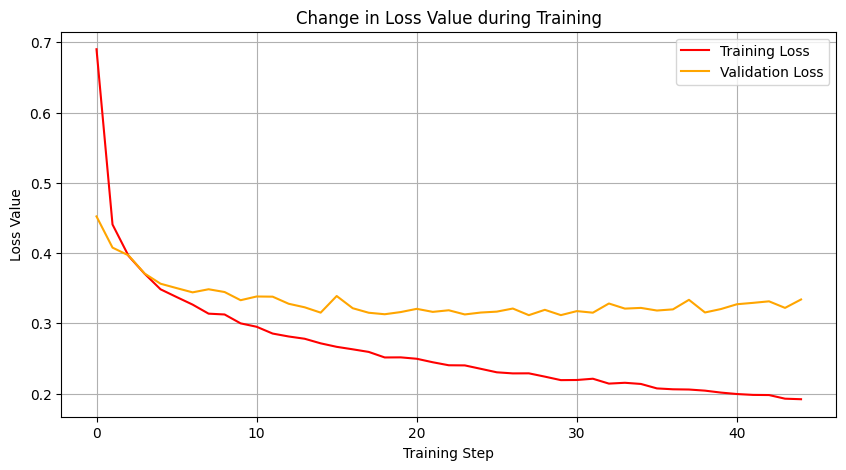

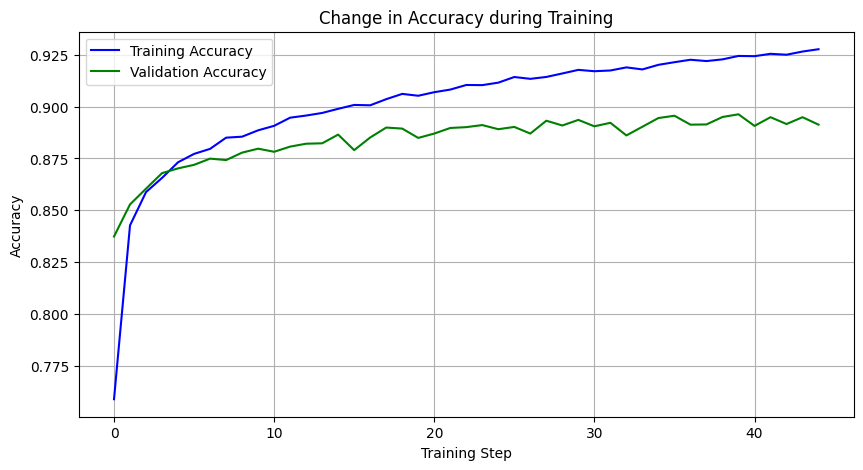

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1564 - accuracy: 0.9409
Train accuracy: 0.9409499764442444
313/313 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8963
Test accuracy: 0.8963000178337097


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Додатково

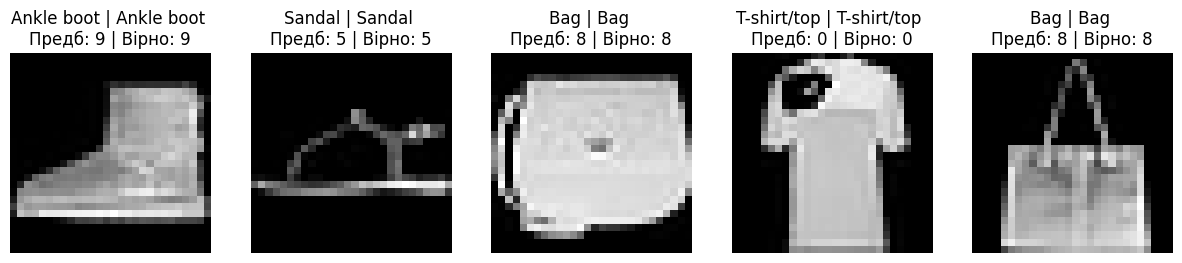

In [6]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Випадковим чином виберемо 5 зображень та їх мітки з тестового набору
random_indices = np.random.choice(len(x_test), 5)
images_to_test = x_test[random_indices]
labels_to_test = y_test[random_indices]

# Отримаємо передбачення для вибраних зображень
predictions = model(images_to_test)
predicted_labels = np.argmax(predictions, axis=1)

# Виведемо зображення та їх передбачені мітки
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_to_test[i].reshape((28, 28)), cmap='gray')
    plt.title(f'{label_names[predicted_labels[i]]} | {label_names[labels_to_test[i]]} \nПредб: {predicted_labels[i]} | Вірно: {labels_to_test[i]}')
    plt.axis('off')
plt.show()

In [4]:
from sklearn.metrics import classification_report

# Get predictions on test data
y_pred = model(x_test)

# Convert predictions to class labels
y_pred_class = tf.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.83      0.82      1000
           3       0.86      0.93      0.89      1000
           4       0.83      0.83      0.83      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.67      0.71      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

